In [21]:
import numpy as np
import pandas as pd

In [30]:
df=pd.read_csv('btc_1h.csv')

In [31]:
df.head()

datetime      open      high       low     close      volume
0  2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199
1  2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006
2  2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572
3  2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030
4  2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329

In [24]:
!pip install yfinance

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf

# Function to implement a basic moving average strategy with a stop-loss
def stop_loss_prediction(data, short_window=40, long_window=100, stop_loss_percentage=2):
    # Create a DataFrame to store trading signals
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['close']
    signals['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals based on moving average crossovers
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Create stop-loss trigger based on a percentage drop from the peak
    signals['peak'] = signals['price'].cummax()
    signals['stop_loss'] = signals['peak'] * (1 - stop_loss_percentage / 100)

    # Trigger stop-loss when the price falls below the stop-loss level
    signals['stop_loss_trigger'] = np.where(signals['price'] < signals['stop_loss'], 1.0, 0.0)

    return signals

# Example usage
# Assuming 'df' is your DataFrame with columns: 'datetime', 'open', 'high', 'low', 'close', 'volume'
# Convert 'datetime' to index if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Adjust parameters as needed
result = stop_loss_prediction(df)

# Print the resulting DataFrame with signals
print(result)


                        price    short_mavg     long_mavg  signal      peak  \
datetime                                                                      
2018-01-01 05:30:00  13529.01  13529.010000  13529.010000     0.0  13529.01   
2018-01-01 06:30:00  13203.06  13366.035000  13366.035000     0.0  13529.01   
2018-01-01 07:30:00  13330.18  13354.083333  13354.083333     0.0  13529.01   
2018-01-01 08:30:00  13410.03  13368.070000  13368.070000     0.0  13529.01   
2018-01-01 09:30:00  13601.01  13414.658000  13414.658000     0.0  13601.01   
...                       ...           ...           ...     ...       ...   
2022-01-31 01:30:00  37684.45  37905.060500  37265.187300     1.0  68633.69   
2022-01-31 02:30:00  37729.00  37906.942500  37262.068300     1.0  68633.69   
2022-01-31 03:30:00  37785.78  37908.092500  37260.314600     1.0  68633.69   
2022-01-31 04:30:00  37881.76  37909.211750  37263.333200     1.0  68633.69   
2022-01-31 05:30:00  36829.30  37885.298750  37261.4

In [33]:
result = stop_loss_prediction(df[27000:29000])

In [34]:
import matplotlib.pyplot as plt

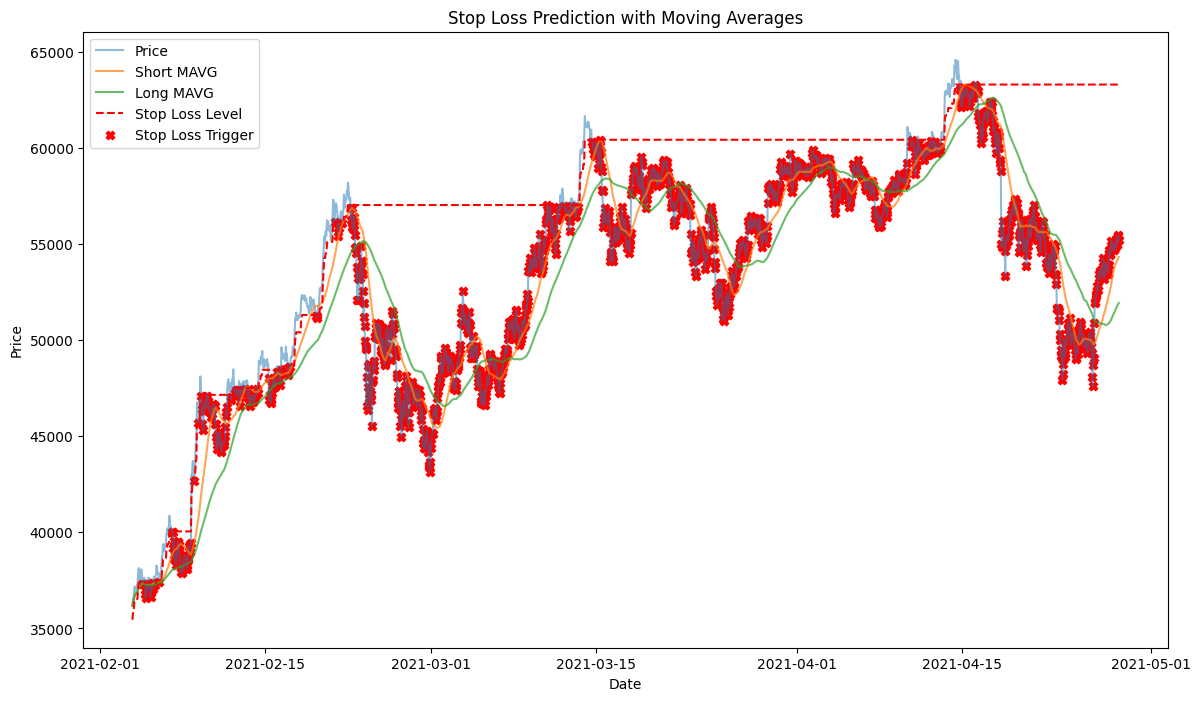

In [35]:
# Plotting
plt.figure(figsize=(14, 8))

# Plotting Price
plt.plot(result.index, result['price'], label='Price', alpha=0.5)

# Plotting Short and Long Moving Averages
plt.plot(result.index, result['short_mavg'], label='Short MAVG', alpha=0.7)
plt.plot(result.index, result['long_mavg'], label='Long MAVG', alpha=0.7)

# Plotting Stop Loss Level
plt.plot(result.index, result['stop_loss'], label='Stop Loss Level', linestyle='--', color='red')

# Marking Stop Loss Triggers
plt.scatter(result[result['stop_loss_trigger'] == 1].index, result['price'][result['stop_loss_trigger'] == 1], marker='X', color='red', label='Stop Loss Trigger')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stop Loss Prediction with Moving Averages')
plt.legend()
plt.show()

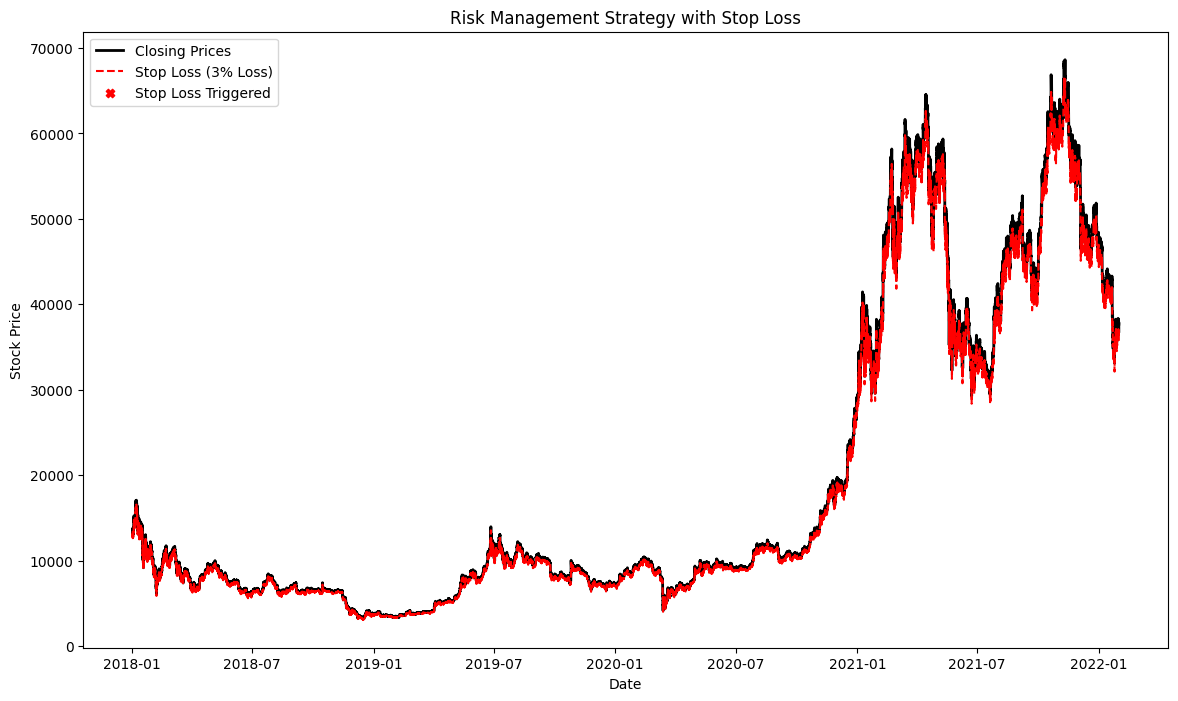

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def apply_stop_loss(data, stop_loss_percentage):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['close']

    # Calculate the stop-loss level based on a percentage drop from the entry price
    signals['stop_loss'] = signals['price'] * (1 - stop_loss_percentage / 100)

    # Trigger stop-loss when the price falls below the stop-loss level
    signals['stop_loss_triggered'] = signals['price'] < signals['stop_loss']

    return signals

# Example usage
# Assuming 'df' is your DataFrame with columns: 'open', 'high', 'low', 'close', 'volume'
# You can adjust the 'stop_loss_percentage' based on your risk tolerance
stop_loss_percentage = 3  # Set your desired stop-loss percentage

risk_management_signals = apply_stop_loss(df, stop_loss_percentage)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Closing Prices', linewidth=2, color='black')

# Plotting the stop-loss level
plt.plot(risk_management_signals['stop_loss'], label=f'Stop Loss ({stop_loss_percentage}% Loss)', linestyle='--', color='red')

# Highlighting where the stop-loss is triggered
plt.scatter(risk_management_signals[risk_management_signals['stop_loss_triggered']].index,
            risk_management_signals['price'][risk_management_signals['stop_loss_triggered']],
            marker='X', color='red', label='Stop Loss Triggered')

plt.title('Risk Management Strategy with Stop Loss')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
